# 1. Загрузка данных

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
train = pd.read_csv('train.csv')
# Вывод первых 5 строк
train.head()


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Осматриваем данные, чтобы понять, какие признаки у нас есть и какие значения они принимают.

In [13]:
# Вывод информации о датафрейме
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [4]:
train.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [8]:
questions = pd.read_csv('questions.csv')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [10]:
questions.tail()

,question_id,bundle_id,correct_answer,part,tags
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125
13522,13522,13522,3,5,55


In [10]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [5]:
lectures = pd.read_csv('lectures.csv')
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [11]:
lectures.tail()

,lecture_id,tag,part,type_of
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept
417,32736,82,3,concept


In [6]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


Промежуточный вывод:
- В данных нет пропусков, нулевые значения означают что задание было дано первым и нету данных предыдущих заданий
- Все основные признаки - числовые

# 2. Распределение переменных

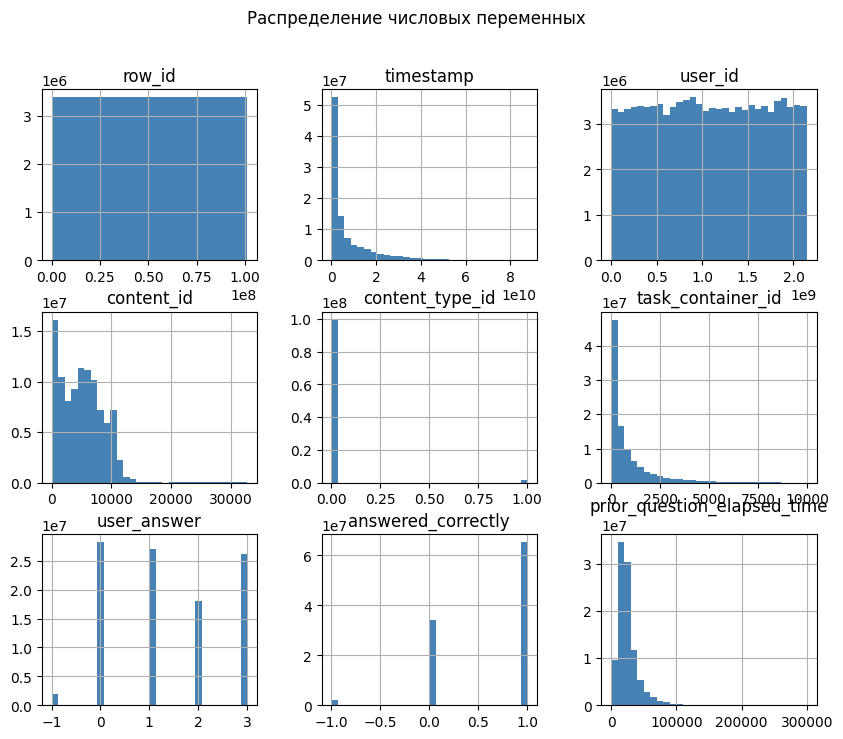

In [12]:
# Распределение числовых переменных
train.hist(bins=30, figsize=(10, 8), color='steelblue')
plt.suptitle('Распределение числовых переменных')
plt.show()

# Распределение категориальных переменных
# for column in ['Sex', 'Pclass', 'Embarked']:
#     sns.countplot(x=column, data=titanic)
#     plt.title(f'Распределение {column}')
#     plt.show()

# 3. Взаимосвязи между признаками

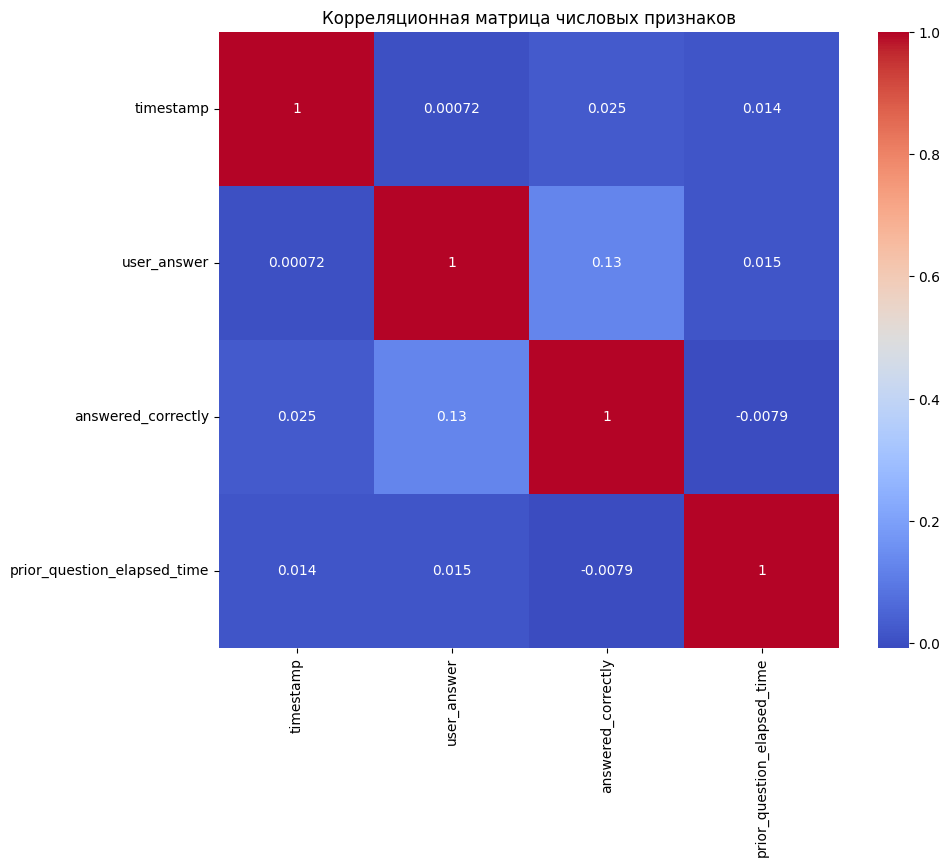

In [23]:
# Выбор только числовых признаков и удаление столбца PassengerId
numeric_cols = train.select_dtypes(include=['int64', 'float64']).drop(columns=['row_id', 'user_id', 'task_container_id', 'content_id', 'content_type_id'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

/var/folders/kd/bpjrn5mj25q78yph_7f2t1ch0000gn/T/ipykernel_54927/1235795946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_data['timestamp'] = question_data['timestamp'] / 1000 / 60


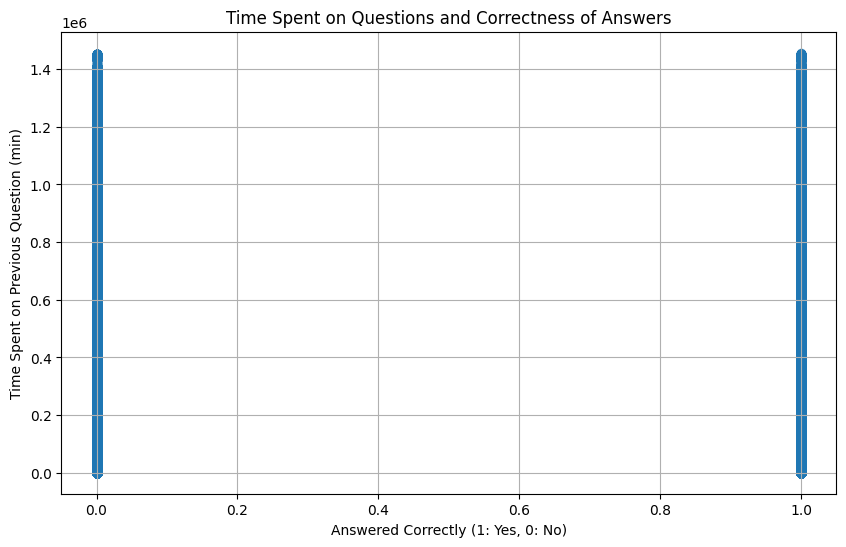

In [21]:
# Filter only questions (content_type_id == 0)
question_data = train[train['content_type_id'] == 0]
# Convert time spent on question to minutes
question_data['timestamp'] = question_data['timestamp'] / 1000 / 60

# Create a scatter plot showing prior_question_elapsed_time vs answered_correctly
plt.figure(figsize=(10, 6))
plt.scatter( question_data['answered_correctly'], question_data['timestamp'], alpha=0.6)

# Adding labels and title
plt.title('Time Spent on Questions and Correctness of Answers')
plt.ylabel('Time Spent on Previous Question (min)')
plt.xlabel('Answered Correctly (1: Yes, 0: No)')

# Displaying plot
plt.grid(True)
plt.show()


/var/folders/kd/bpjrn5mj25q78yph_7f2t1ch0000gn/T/ipykernel_54927/1356534376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_questions['time_spent'] = df_questions.groupby('user_id')['prior_question_elapsed_time'].shift(-1)
/var/folders/kd/bpjrn5mj25q78yph_7f2t1ch0000gn/T/ipykernel_54927/1356534376.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/kd/bpjrn5mj25q78yph_7f2t1ch0000gn/T/ipykernel_54927/1356534376.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


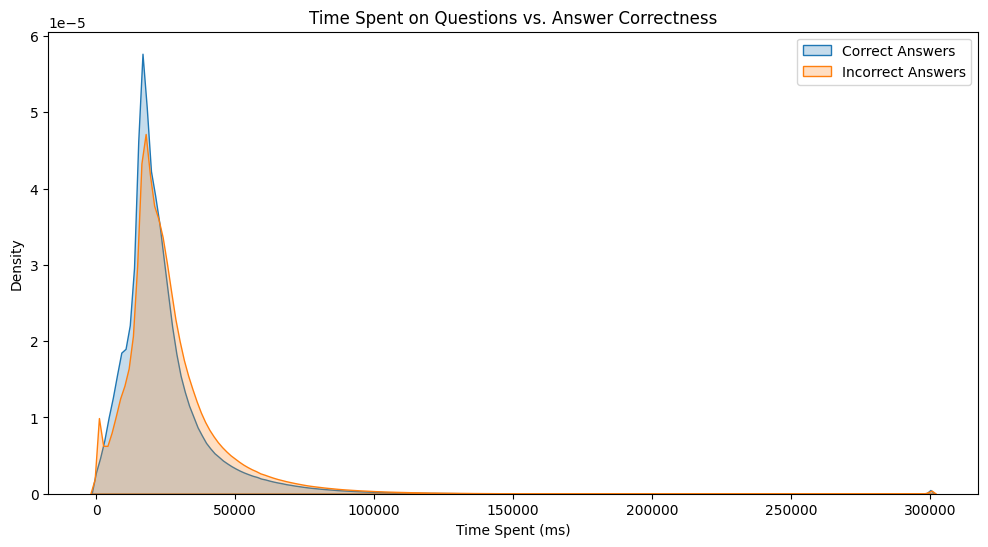

In [24]:
# Step 1: Filter out lectures and keep only questions
df_questions = train[train['content_type_id'] == 0]

# Step 2: Shift 'prior_question_elapsed_time' to align with the current question
df_questions['time_spent'] = df_questions.groupby('user_id')['prior_question_elapsed_time'].shift(-1)

# Step 3: Drop rows with missing values in 'time_spent' or 'answered_correctly'
df_questions = df_questions.dropna(subset=['time_spent', 'answered_correctly'])

# Step 4: Convert 'answered_correctly' to integer type
df_questions['answered_correctly'] = df_questions['answered_correctly'].astype(int)

# Step 5: Plot the distribution of time spent on questions by answer correctness
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_questions[df_questions['answered_correctly'] == 1]['time_spent'],
    label='Correct Answers',
    shade=True
)
sns.kdeplot(
    data=df_questions[df_questions['answered_correctly'] == 0]['time_spent'],
    label='Incorrect Answers',
    shade=True
)
plt.title('Time Spent on Questions vs. Answer Correctness')
plt.xlabel('Time Spent (ms)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# # Step 1: Filter out lectures and keep only questions
# df_questions = train[train['content_type_id'] == 0]

# # Step 2: Shift 'prior_question_elapsed_time' to align with the current question
# df_questions['time_spent'] = df_questions.groupby('user_id')['prior_question_elapsed_time'].shift(-1)

# # Step 3: Drop rows with missing values in 'time_spent' or 'answered_correctly'
# df_questions = df_questions.dropna(subset=['time_spent', 'answered_correctly'])

# Step 4: Convert 'answered_correctly' to integer type
df_questions['answered_correctly'] = df_questions['answered_correctly'].astype(int)

# Step 5: Plot the distribution of time spent on questions by answer correctness
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_questions[df_questions['answered_correctly'] == 1]['prior_question_elapsed_time'],
    label='Correct Answers',
    shade=True
)
sns.kdeplot(
    data=df_questions[df_questions['answered_correctly'] == 0]['prior_question_elapsed_time'],
    label='Incorrect Answers',
    shade=True
)
plt.title('Time Spent on Questions vs. Answer Correctness')
plt.xlabel('Time Spent (ms)')
plt.ylabel('Density')
plt.legend()
plt.show()